In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('../dataset/airline/train.csv')
data = data.drop('id', axis=1)

test = pd.read_csv('../dataset/airline/test.csv')
test = test.drop('id', axis=1)

pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 함
data # 데이터 확인

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [3]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

In [4]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

## 상관계수

In [5]:
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

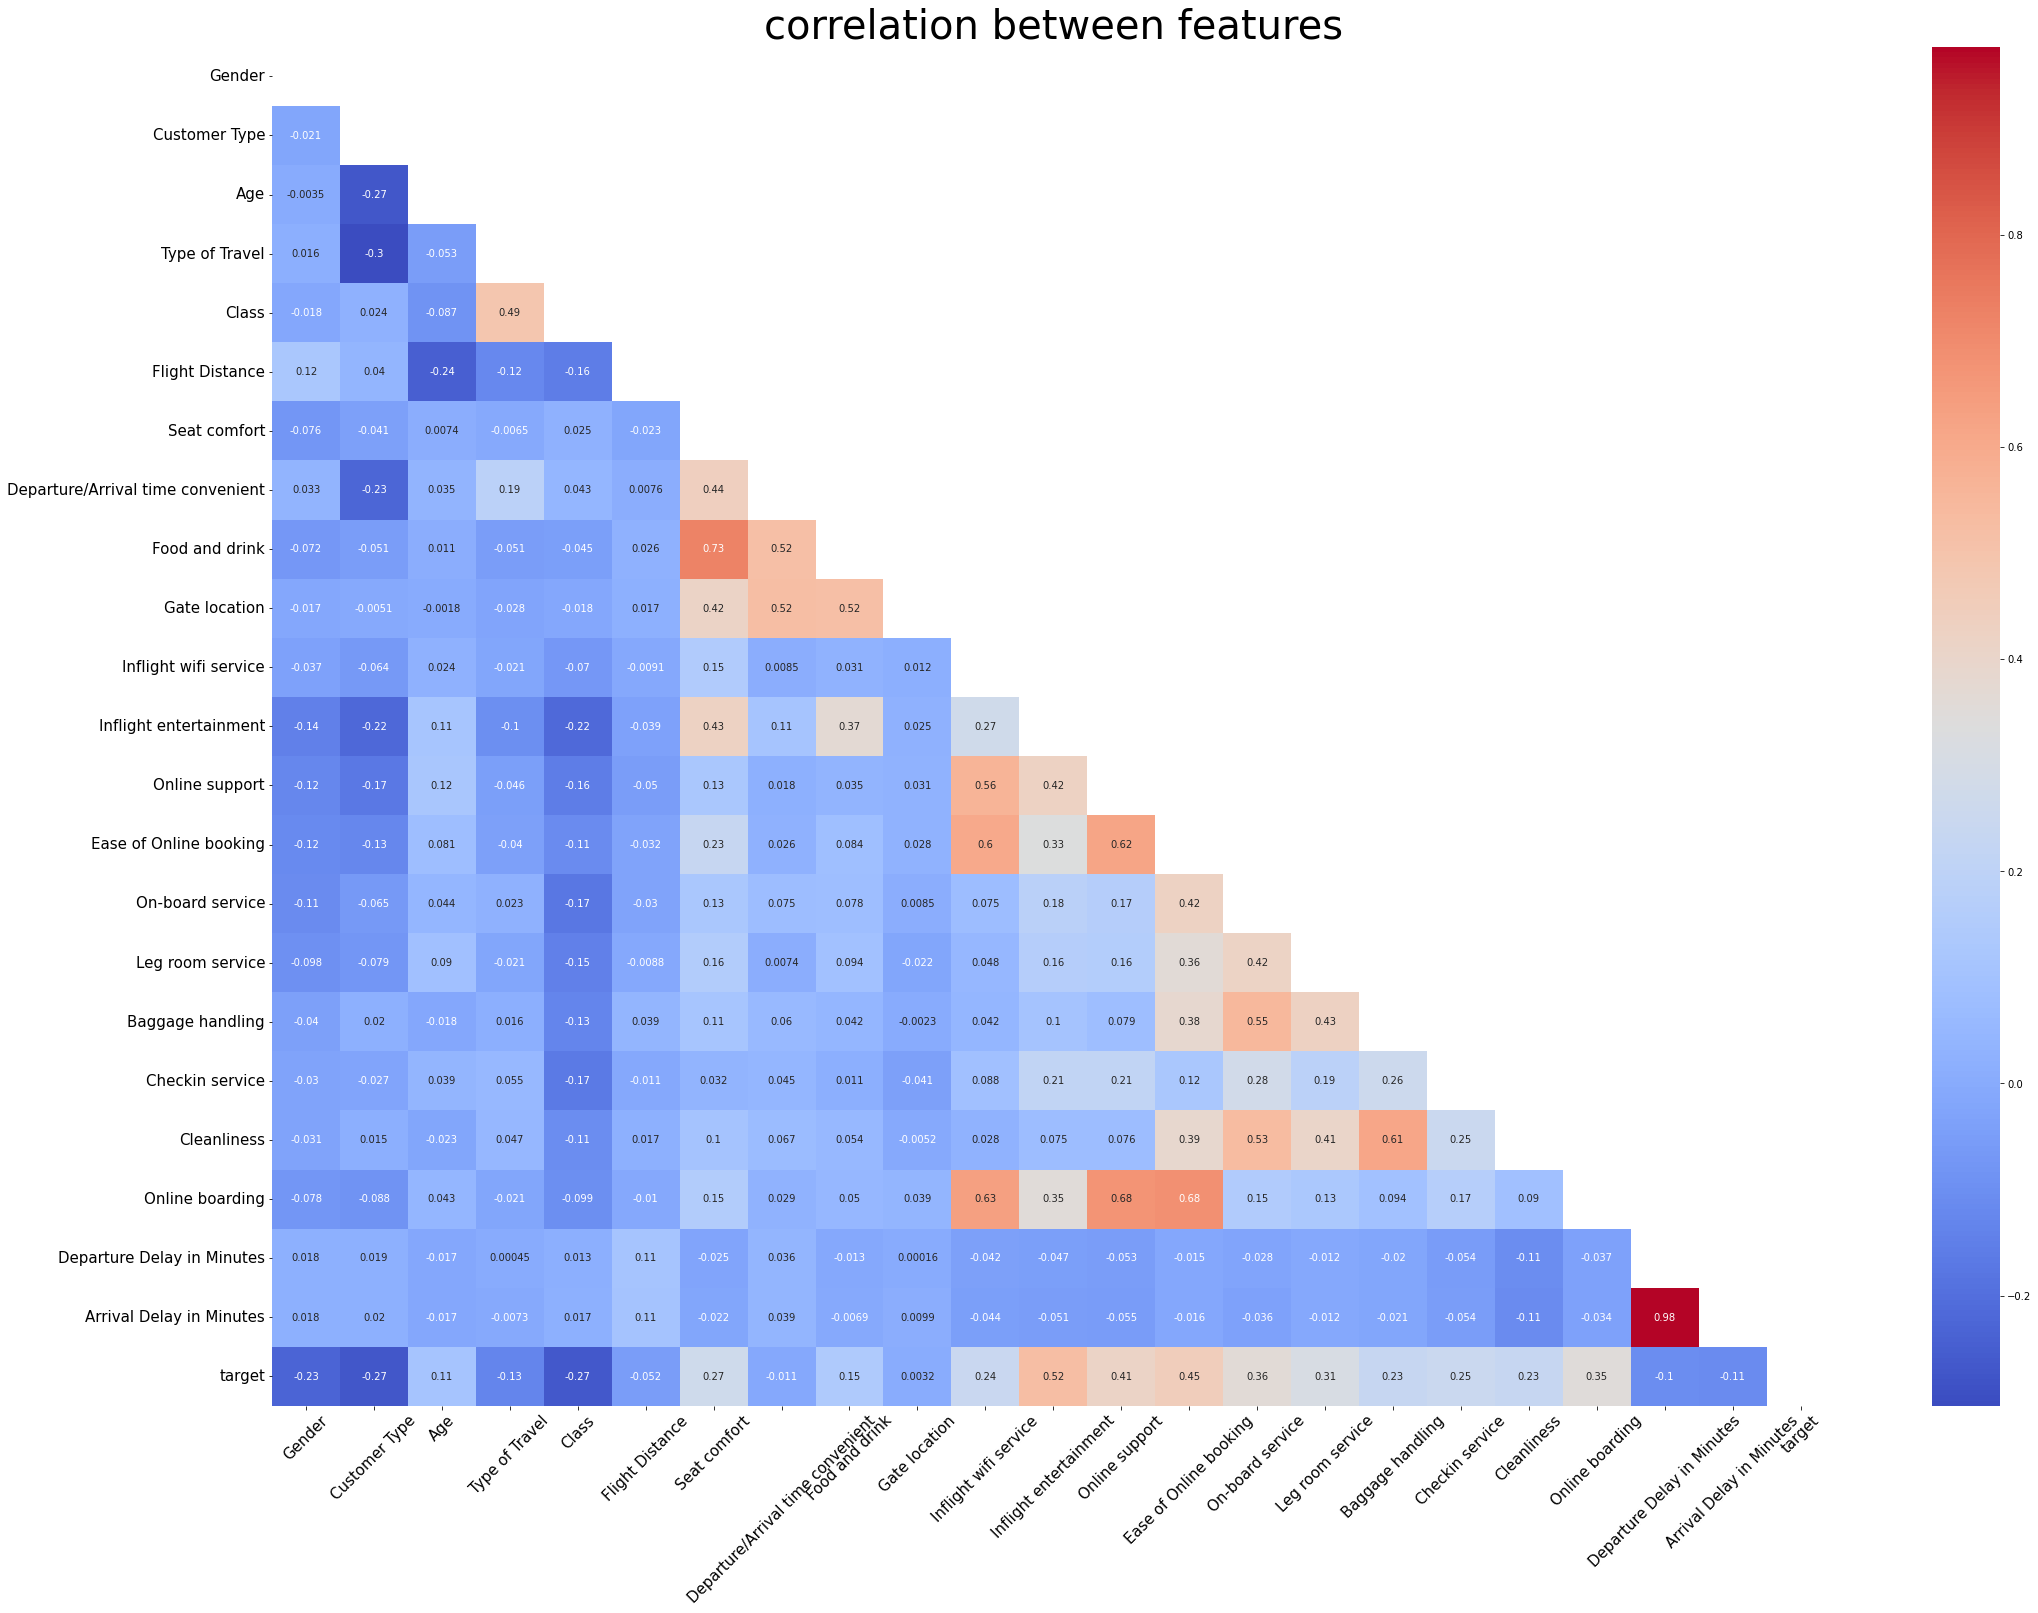

In [6]:
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

## 다중공선성

In [7]:
data.drop('Departure Delay in Minutes', axis = 1, inplace = True)
data.drop('Food and drink', axis = 1, inplace = True)
test.drop('Departure Delay in Minutes', axis = 1, inplace = True)
test.drop('Food and drink', axis = 1, inplace = True)

## 이상치 평균화

In [8]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    # 넘파이의 값을 퍼센트로 표시해주는 함수

    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [9]:
ArrivalDelay_index_data = outliers_iqr(data['Arrival Delay in Minutes'])[0]
FlightDistance_index_data = outliers_iqr(data['Flight Distance'])[0]
GarageArea_index_data = outliers_iqr(data['Checkin service'])[0]

In [10]:
data.loc[ArrivalDelay_index_data, 'Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].mean()
data.loc[FlightDistance_index_data, 'Flight Distance'] = data['Flight Distance'].mean()
data.loc[GarageArea_index_data, 'Checkin service'] = data['Checkin service'].mean()

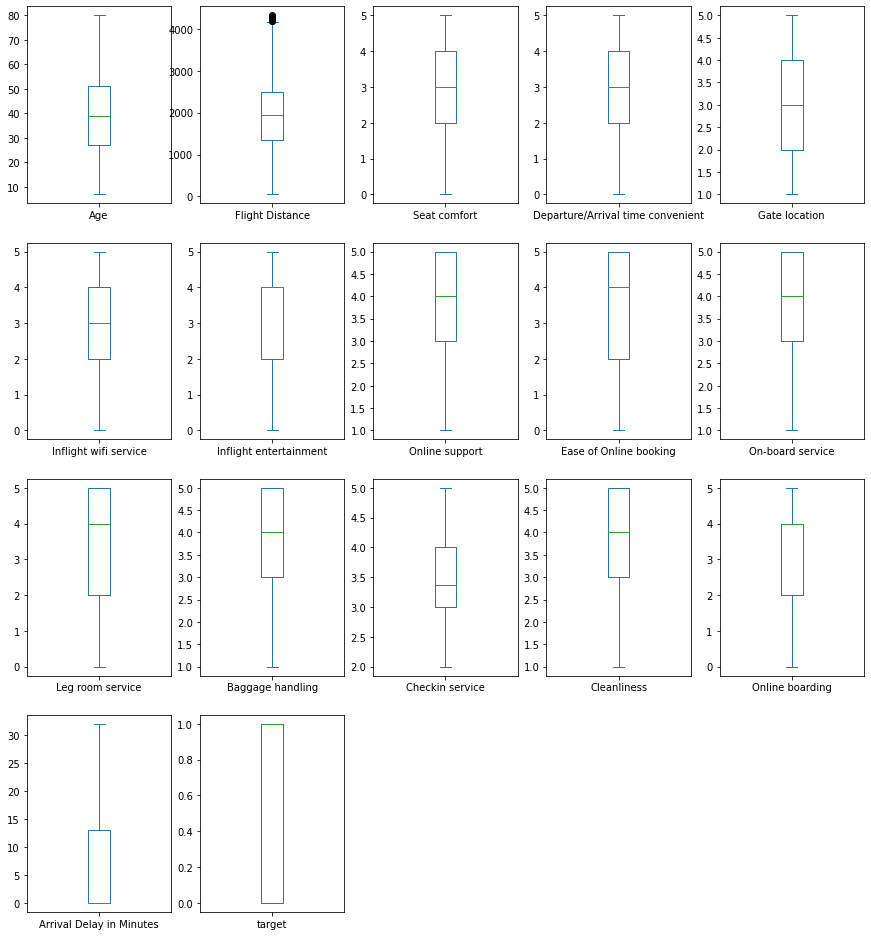

In [11]:
data.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 21))
plt.show()       

In [12]:
ArrivalDelay_index_test = outliers_iqr(test['Arrival Delay in Minutes'])[0]
FlightDistance_index_test = outliers_iqr(test['Flight Distance'])[0]
GarageArea_index_test = outliers_iqr(test['Checkin service'])[0]

test.loc[ArrivalDelay_index_test, 'Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].mean()
test.loc[FlightDistance_index_test, 'Flight Distance'] = test['Flight Distance'].mean()
test.loc[GarageArea_index_test, 'Checkin service'] = test['Checkin service'].mean()

## 원본 데이터 라벨

In [13]:
# 데이터 셋
data[data.columns[data.dtypes=='O']] = data[data.columns[data.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

# 테스트 셋
test[test.columns[test.dtypes=='O']] = test[test.columns[test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

## 모델 학습

In [14]:
# 여러 모델 비교
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [15]:
import numpy as np

def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [16]:
from sklearn.model_selection import KFold, GridSearchCV

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

def kfold(model, train, scale = False):
    cv_accuracy = []
    cv = StratifiedKFold(n_splits=5)
    
    n_iter = 0
    
    for t, v in cv.split(train, train['target']):
        
        train_cv = train.iloc[t] # 훈련용
        val_cv = train.iloc[v] # 검증용 분리

        train_X = train_cv.drop('target', axis=1)
        train_y = train_cv['target']

        val_X = val_cv.drop('target', axis=1)
        val_y = val_cv['target']
            
        model.fit(train_X, train_y)
        score = ACCURACY(val_y, model.predict(val_X))
        
        cv_accuracy.append(score)
        n_iter += 1
    return np.mean(cv_accuracy)

In [18]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20, n_estimators=300),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric = 'logloss', \
                              max_depth = 5, \
                              min_child_weight = 3, \
                               gamma = 3, \
                               colsample_bytree = 0.5, \
                               n_estimators=700),
    LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24),
    CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500),
    ExtraTreesClassifier(max_depth=25, n_estimators=320)
]

print('스케일링 적용 전')
for model in models:
    print(f'{type(model).__name__} score: {kfold(model, data)}')

스케일링 적용 전
KNeighborsClassifier score: 0.6060000000000001
LogisticRegression score: 0.8123333333333334
DecisionTreeClassifier score: 0.8753333333333332
RandomForestClassifier score: 0.8939999999999999
GradientBoostingClassifier score: 0.9123333333333333
XGBClassifier score: 0.9283333333333333
LGBMClassifier score: 0.932
CatBoostClassifier score: 0.9406666666666667
ExtraTreesClassifier score: 0.9243333333333335


### RandomForest

In [19]:
params = { 'n_estimators' : [10, 100, 1000],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [21]:
train = data.drop('target', axis=1)
target = data['target']

model_RFC = RandomForestClassifier()
grid_cv_RFC = GridSearchCV(model_RFC, param_grid = params, cv=5, n_jobs = -1)
grid_cv_RFC.fit(train, target) # train과 target은 위에 train_test_split하기 전에 있었음
print('최적 하이퍼 파라미터: ', grid_cv_RFC.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_RFC.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.8987


### XGB

In [22]:
model_XGB = XGBClassifier(eval_metric='logloss', silent = True)

param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50],
                 'objective':['binary:logistic'],
                 'random_state':[2]}

grid_cv_XGB=GridSearchCV(model_XGB, param_grid=param_grid, cv=5 , n_jobs=-1)
grid_cv_XGB.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_XGB.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_XGB.best_score_))

[00:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


최적 하이퍼 파라미터:  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
최고 예측 정확도: 0.9353


### LGBM

In [23]:
model_LGBM = LGBMClassifier()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [100, 500, 1000],
    'num_leaves': [12, 16, 20], # large num_leaves helps improve accuracy but might lead to over-fitting
    'boosting_type' : ['dart'], # for better accuracy -> try dart
    'objective' : ['binary'],
    'max_bin':[300, 600], # large max_bin helps improve accuracy but might slow down training progress
    }

grid_cv_LGBM = GridSearchCV(model_LGBM, param_grid=gridParams, cv=3 , n_jobs=-1)
grid_cv_LGBM.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_LGBM.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_LGBM.best_score_))

최적 하이퍼 파라미터:  {'boosting_type': 'dart', 'learning_rate': 0.01, 'max_bin': 300, 'n_estimators': 1000, 'num_leaves': 20, 'objective': 'binary'}
최고 예측 정확도: 0.9107


### CatBoost

In [24]:
model_CAT = CatBoostClassifier(silent = True)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_cv_CAT = GridSearchCV(model_CAT, param_grid=grid, cv=3 , n_jobs=-1)
grid_cv_CAT.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_CAT.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_CAT.best_score_))

최적 하이퍼 파라미터:  {'depth': 6, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
최고 예측 정확도: 0.9417


### Extra

In [46]:
model_EXT = ExtraTreesClassifier()

grid = {'n_estimators': [100],
        'max_depth': [2, 4, 7, 12, 16],
       }

grid_cv_EXT = GridSearchCV(model_EXT, param_grid=grid, cv=3 , n_jobs=-1)
grid_cv_EXT.fit(train, target)
print('최적 하이퍼 파라미터: ', grid_cv_EXT.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_EXT.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 16, 'n_estimators': 100}
최고 예측 정확도: 0.9200


## Submission

최적 하이퍼 파라미터:  {'booster': 'gbtree', 'colsample_bylevel': 0.9, 'colsample_bytree': 0.8, 'gamma': 0, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'nthread': 4, 'objective': 'binary:logistic', 'random_state': 2, 'silent': True}
최고 예측 정확도: 0.9353

In [38]:
train = data.drop('target', axis=1)
target = data['target']

best_model_XGB = XGBClassifier(eval_metric = 'logloss', \
                              silent = True, \
                              max_depth = 5, \
                              min_child_weight = 3, \
                               gamma = 3, \
                               colsample_bytree = 0.5, \
                               n_estimators=700)
best_model_LGBM = LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24)
best_model_CAT = CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500)
best_model_EXTRA = ExtraTreesClassifier(max_depth=16, n_estimators=100)


from sklearn.ensemble import VotingClassifier
softVoting_model = VotingClassifier(estimators=[('XGB', best_model_XGB), ('LGBM', best_model_LGBM), ('CAT', best_model_CAT), ('EXTRA', best_model_EXTRA)], voting='soft') 
softVoting_model.fit(train, target)

[00:49:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




VotingClassifier(estimators=[('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5,
                                            enable_categorical=False,
                                            eval_metric='logloss', gamma=3,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=3, missing=nan,
                                            monoto...
                                            predictor=None, random_state=None,
                                    

(array([ 913.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1087.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

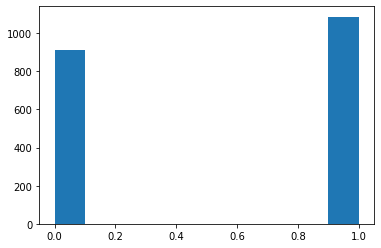

In [39]:
soft_pred = softVoting_model.predict(test)
plt.hist(soft_pred)

In [40]:
submission = pd.read_csv('../dataset/airline/submission.csv')
submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0


In [41]:
submission['target'] = soft_pred
submission

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,0
1996,1997,1
1997,1998,0
1998,1999,1


In [42]:
submission.to_csv('23. GridSearchCV.csv', index=False)